#### Isomap
* appled on photos of sculpture heads ([Dr. Tenenbaum](https://web.archive.org/web/20160913051505/http://isomap.stanford.edu/datasets.html))

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.io
import numpy as np
import math
import random

In [2]:
# load the images
flc = '/Users/pinqingkan/Desktop/DataScience/PythonDataScience/DAT210x-master/Module4/Datasets/'
fname = flc + 'face_data.mat'
data = scipy.io.loadmat(fname)
# four variables in the dataset
image_pcs = data['image_pcs']
images = data['images']
lights = data['lights']
poses = data['poses']

In [3]:
# reshape the image matrices
Npixel, Nimage = images.shape
Npixel = int(math.sqrt(Npixel))
X = np.zeros((Nimage, Npixel*Npixel))
for i in range(Nimage):
    X[i,:] = np.rot90(images[:,i].reshape(Npixel, Npixel), 3).reshape(-1)

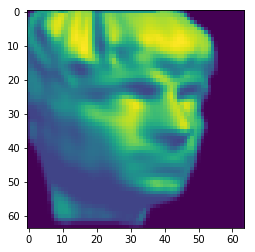

In [4]:
# plot the original images - see if make sense
plt.imshow(X[0,:].reshape(Npixel, Npixel))
plt.show()

* The next part of exercise is to compare PCA & isomap
* try 3 PC & 3D embedding
* for visualization: first try 2PC / 2D; then try 3PC / 3D

In [5]:
def Plot2D(X, Y, Nsamples, Nimage, Npixel, a, b):
    xrange = (max(Y[:,a]) - min(Y[:,a])) * .15
    yrange = (max(Y[:,b]) - min(Y[:,b])) * .15
    # 2D scatter plot after transformation
    # with some images printed on associated samples
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    # scatter plot
    ax.scatter(Y[:,a], Y[:,b], marker = '.')
    plt.axis([min(Y[:,a]), max(Y[:,a]), min(Y[:,b]), max(Y[:,b])])
    for i in range(Nsamples):
        img = int(random.random()*Nimage)
        # the location of the image
        x0 = Y[img,a] - xrange/2.0
        y0 = Y[img,b] - yrange/2.0
        x1 = Y[img,a] + xrange/2.0
        y1 = Y[img,b] + yrange/2.0
        # plot the images
        img0 = X[img,:].reshape(Npixel, Npixel)
        ax.imshow(img0, cmap = plt.cm.gray, extent = (x0, x1, y0, y1), aspect = 'auto')
    plt.show()

In [6]:
def Plot3D(X, Y, Nsamples, Nimage, Npixel):
    xrange = (max(Y[:,0]) - min(Y[:,0])) * .15
    yrange = (max(Y[:,1]) - min(Y[:,1])) * .15
    # 3D scatter plot after transformation
    # with some images printed on associated samples
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection = '3d')
    # scatter plot
    ax.scatter(Y[:,0], Y[:,1], Y[:,2], marker = '.')
    ax.set_xlim3d(min(Y[:,0])*1.05, max(Y[:,0])*1.05)
    ax.set_ylim3d(min(Y[:,1])*1.05, max(Y[:,1])*1.05)
    ax.set_zlim3d(min(Y[:,2])*1.05, max(Y[:,2])*1.05)
    for i in range(Nsamples):
        img = int(random.random()*Nimage)
        # the location of the image
        x0 = Y[img,0] - xrange/2.0
        y0 = Y[img,1] - yrange/2.0
        x1 = Y[img,0] + xrange/2.0
        y1 = Y[img,1] + yrange/2.0
        # plot the images
        xx, yy = np.meshgrid(np.linspace(x0,x1,Npixel), np.linspace(y0,y1,Npixel))
        img0 = np.rot90(X[img,:].reshape(Npixel, Npixel), 2)
        ax.contourf(xx, yy, img0, cmap = plt.cm.gray)
    plt.show()

In [7]:
# PCA on the images
pca = PCA(n_components = 3, svd_solver = 'full')
Ypca = pca.fit(X)
PCA(copy = True, n_components = 3, whiten = False)
Y = pca.transform(X)

In [8]:
Ypca.explained_variance_ratio_

array([ 0.27073666,  0.21588143,  0.11532737])

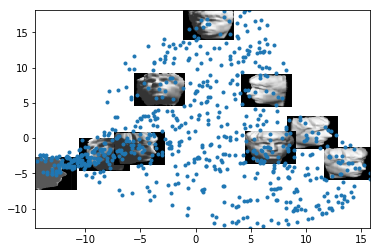

In [9]:
Nsamples = 10
Plot2D(X, Y, Nsamples, Nimage, Npixel, 0, 1)

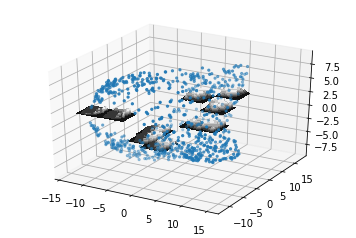

In [10]:
Nsamples = 10
Plot3D(X, Y, Nsamples, Nimage, Npixel)

In [11]:
# isomap
iso = Isomap(n_neighbors = 3, n_components = 3)
Ziso = iso.fit(X)
Isomap(eigen_solver = 'auto', max_iter = None, n_neighbors = 5, n_components = 3, 
       neighbors_algorithm = 'auto', path_method = 'auto', tol = 0)
Z = iso.transform(X)

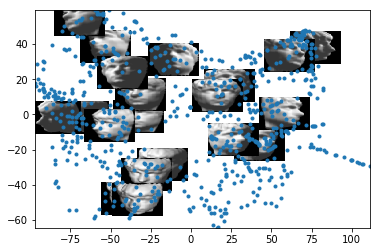

In [12]:
Nsamples = 20
Plot2D(X, Z, Nsamples, Nimage, Npixel, 0, 1)

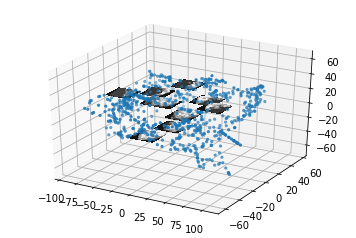

In [13]:
Nsamples = 10
Plot3D(X, Z, Nsamples, Nimage, Npixel)